In [1]:
import sounddevice as sd
from scipy.io.wavfile import write
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
def get_time(freq, num_of_samples):
    return num_of_samples / freq

# Task 2

In [3]:
fs = 8000
seconds = 5
my_rec_8 = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()
write('8k.wav', fs, my_rec_8)

In [4]:
fs = 44100
seconds = 5
my_rec_44_1 = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()
write('44_1k.wav', fs, my_rec_44_1)

In [5]:
# playing the file
import sounddevice as sd
import soundfile as sf

filename = '8k.wav'

data, fs = sf.read(filename, dtype='float32')  
sd.play(data, fs)
status = sd.wait()


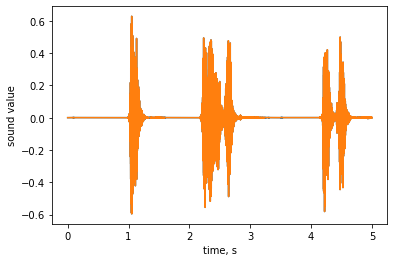

In [6]:
duration = len(my_rec_8) / 8000
time = np.arange(0,duration,1 / 8000) #time vector
plt.plot(time, my_rec_8)
plt.xlabel("time, s")
plt.ylabel("sound value")
plt.show()

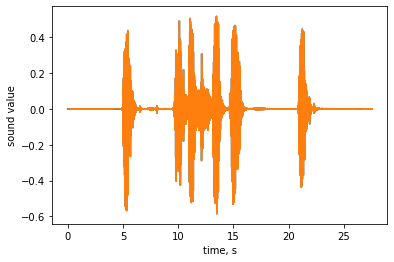

In [7]:
duration = len(my_rec_44_1) / 8000
time = np.arange(0,duration,1 / 8000) #time vector
plt.plot(time, my_rec_44_1)
plt.xlabel("time, s")
plt.ylabel("sound value")
plt.show()

# Task 3

In [8]:
import scipy.io

In [9]:
healthy_eeg = scipy.io.loadmat('files/eeg_healthy_1.mat')['sig']
sick_eeg = scipy.io.loadmat('files/eeg_sick_1.mat')['sig']

In [10]:
healthy_eeg

array([[ 15.75,  15.75,  15.75, ..., -10.5 , -10.5 , -10.5 ]])

In [11]:
total_time = get_time(256, len(healthy_eeg[0]))

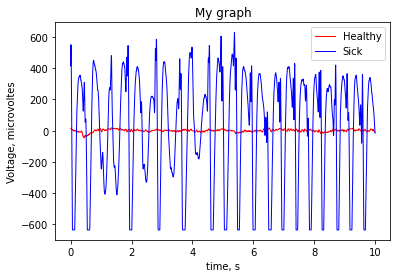

In [12]:
mysignals = [{'name': 'Healthy', 'x': np.linspace(0, total_time, 2561),
             'y': healthy_eeg[0], 'color':'r', 'linewidth':1},
            {'name': 'Sick', 'x': np.linspace(0, total_time, 2561),
             'y': sick_eeg[0], 'color':'b', 'linewidth':1}]

fig, ax = plt.subplots()
for signal in mysignals:
    ax.plot(signal['x'], signal['y'], 
            color=signal['color'], 
            linewidth=signal['linewidth'],
            label=signal['name'])

# Enable legend
ax.legend()
ax.set_title("My graph")

plt.ylabel("Voltage, microvoltes")
plt.xlabel("time, s")
plt.show()

# Task 4

In [13]:
from scipy.interpolate import interp1d

ecg_normal = np.load('files/EKG_normal.npz')
ecg_anomaly = np.load('files/EKG_anomaly.npz')

In [15]:
def plot_ecg(b):
    f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 25), sharex=True)

    # reading the input
    fs = b['fs']
    labels = b['labels_indexes']

    # calculating intervals between r-зубцями
    interval_lengths = np.array([get_time(fs, labels[i] - labels[i-1]) for i in range(1, len(labels))])
    interval_indexes = b['labels_indexes'][1:]
    interval_times = np.array([get_time(fs, interval_indexes[i]) for i in range(len(interval_indexes))]) # in seconds

    time = np.arange(b['signal'].size) / fs

    # plotting input raw signal
    ax1.plot(time, b['signal'])
    ax1.set_ylabel("ECG in mV")
    ax1.set_xlabel("time, s")
    ax1.set_title("ECG in mV by time")

    # interpolating function
    f = interp1d(interval_times, interval_lengths)

    ax2.plot(interval_times, interval_lengths, 'o')
    ax2.plot(interval_times, f(interval_times), '-')
    ax2.set_ylim(ymin=0, ymax=1)
    ax2.set_xlabel("time, s")
    ax2.set_ylabel("R- intervacl, s")
    ax2.set_title("Interpolated R-interval length by time")

    # interpolating 1 hz signal
    timestamps_1hz = [i for i in range(math.ceil(min(interval_times)), math.floor(max(interval_times)) + 1)]

    ax3.plot(interval_times, f(interval_times), '-')
    ax3.plot(timestamps_1hz, f(timestamps_1hz), "o")

    ax3.set_ylim(ymin=0, ymax=1)
    ax3.set_xlabel("time, s")
    ax3.set_ylabel("Interpolated R-interval, s")
    ax3.set_title("Interpolated R-interval length by time. Sample rate: 1 Hz ")
    
    plt.show()

Normal person ECG:


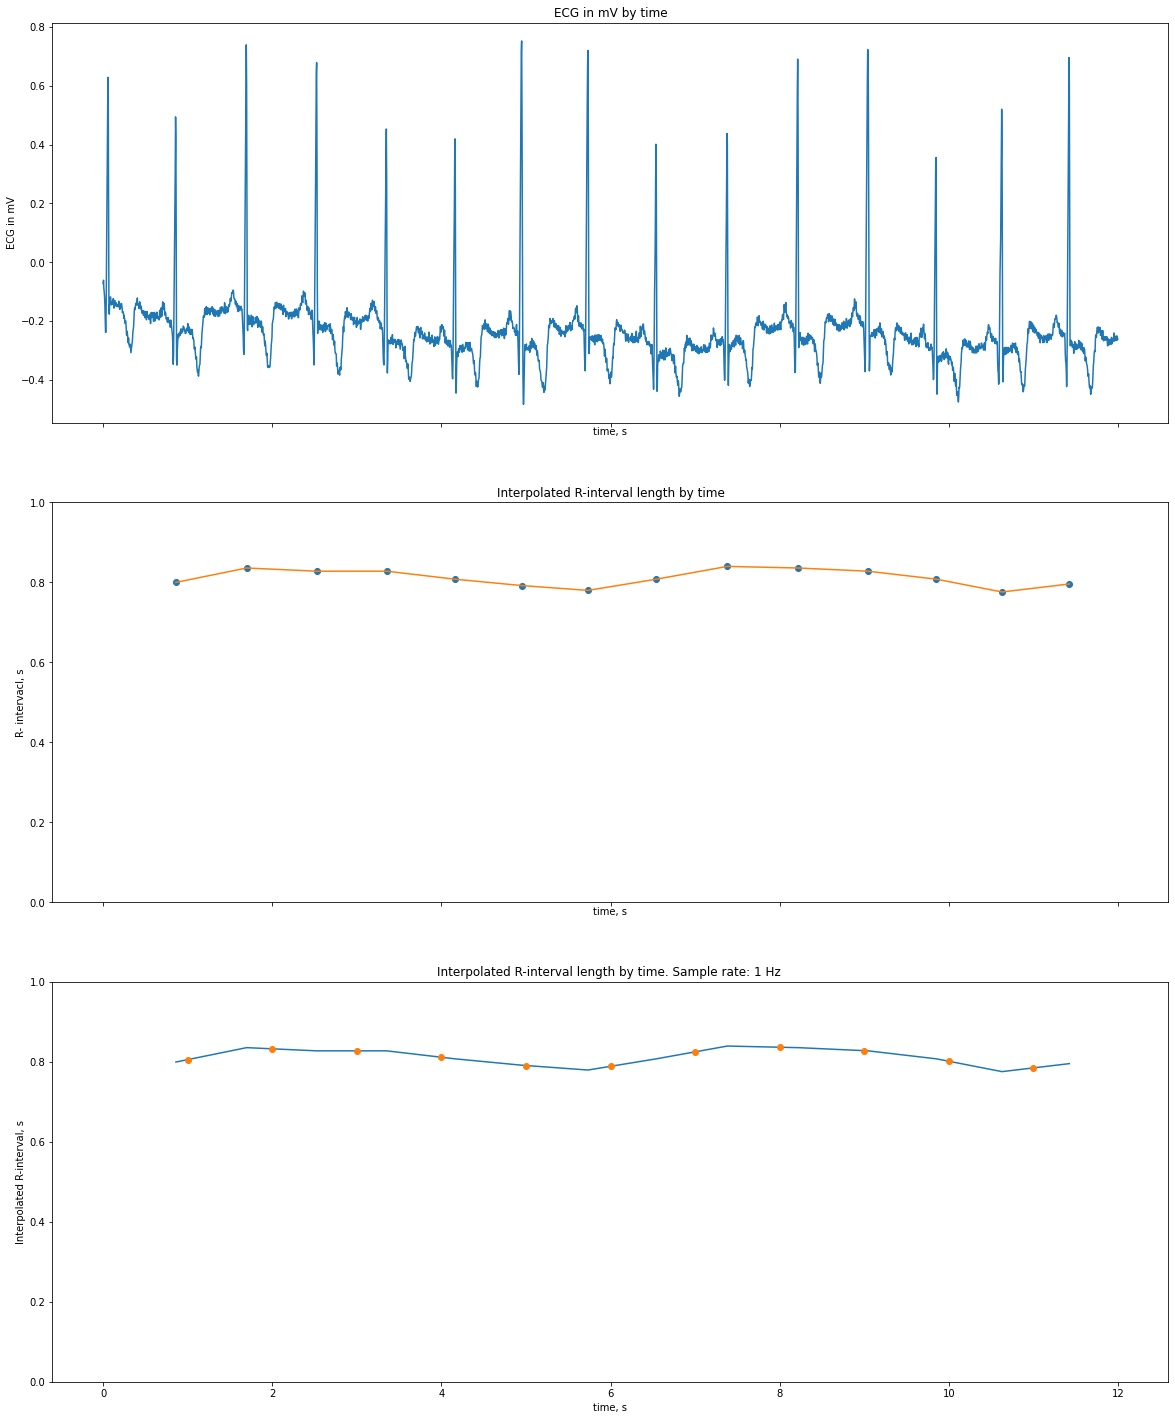

In [16]:
print("Normal person ECG:")
plot_ecg(ecg_normal)

Anomaly ECG:


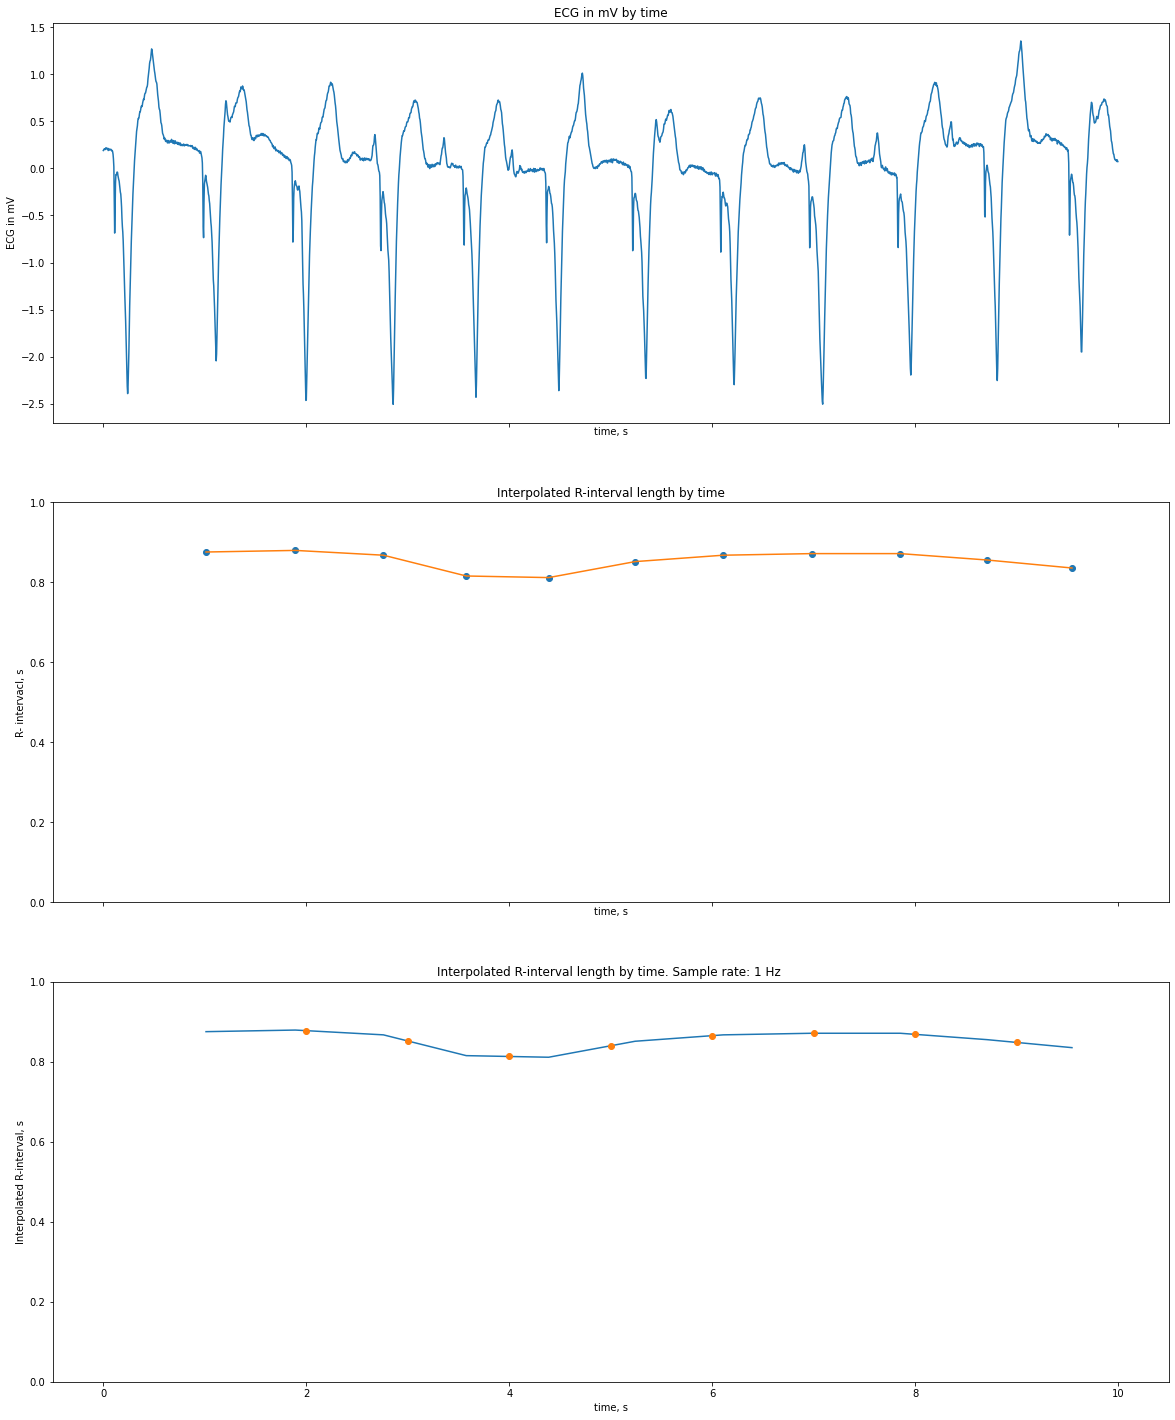

In [17]:
print("Anomaly ECG:")
plot_ecg(ecg_anomaly)

# Task 6



In [18]:
def rename_cols(df):
    new_cols = ["time_ms", "top_left_f_kg", "top_right_f_kg", "bottom_left_f_kg", "bottom_right_f_kg", "cop_x", "cop_y", "total_f"]
    df.columns = new_cols
    return df

a_bc = pd.read_csv("files/data/acrobats/base_close/1.csv", sep=' ')
a_bc = rename_cols(a_bc)

h_bc = pd.read_csv("files/data/handball/base_close/1.csv", sep=' ')
h_bc = rename_cols(h_bc)

a_bc

,time_ms,top_left_f_kg,top_right_f_kg,bottom_left_f_kg,bottom_right_f_kg,cop_x,cop_y,total_f
0,3266472,4.37391,5.40824,8.01354,8.08365,1.066920,3.66028,25.8793
1,3266492,4.42609,5.45495,8.12862,8.12108,0.977126,3.65585,26.1307
2,3266502,4.41739,5.46429,8.11815,7.95267,0.849059,3.57720,25.9525
3,3266512,4.41739,5.46429,8.11815,7.95267,0.849059,3.57720,25.9525
4,3266522,4.43478,5.46429,8.08677,8.13043,1.027300,3.62885,26.1163
...,...,...,...,...,...,...,...,...
2669,3296411,4.53913,5.73516,7.91938,7.84975,1.081270,3.16481,26.0434
2670,3296420,4.53913,5.73516,7.91938,7.84975,1.081270,3.16481,26.0434
2671,3296431,4.54783,5.77253,7.78338,7.85911,1.252200,3.07486,25.9628
2672,3296444,4.58261,5.71648,7.81477,7.82168,1.099640,3.08690,25.9355


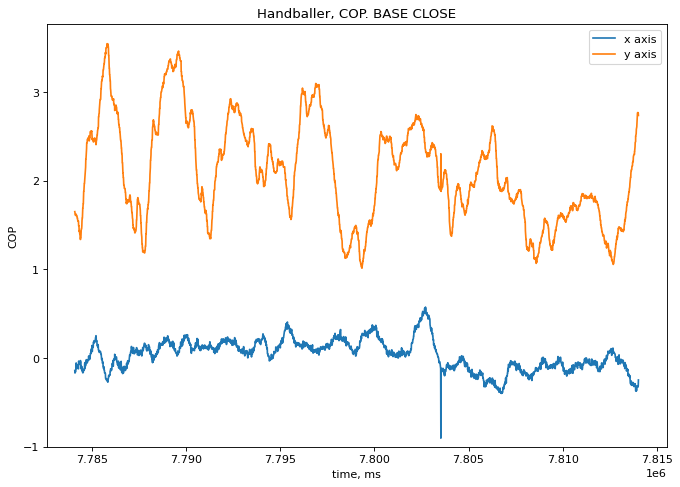

In [22]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7), dpi=80)

plt.plot(h_bc["time_ms"], h_bc["cop_x"], label="x axis")
plt.plot(h_bc["time_ms"], h_bc["cop_y"], label="y axis")

plt.xlabel("time, ms")
plt.ylabel("COP")

plt.legend()
plt.title("Handballer, COP. BASE CLOSE")
plt.ylim(-1)
plt.show()

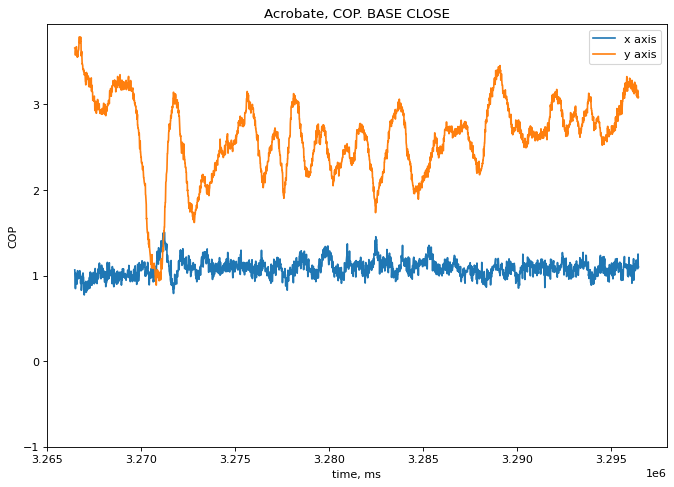

In [23]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7), dpi=80)

plt.plot(a_bc["time_ms"], a_bc["cop_x"], label="x axis")
plt.plot(a_bc["time_ms"], a_bc["cop_y"], label="y axis")

plt.xlabel("time, ms")
plt.ylabel("COP")

plt.legend()
plt.title("Acrobate, COP. BASE CLOSE")
plt.ylim(-1)

plt.show()

# todo y and x

In [24]:
# BASE CLOSE
cop_x_acrobate, cop_y_acrobate = a_bc['cop_x'], a_bc['cop_y']
cop_x_handball, cop_y_handball = h_bc['cop_x'], h_bc['cop_y']

print(cop_x_acrobate.describe(), cop_y_acrobate.describe())


count    2674.000000
mean        1.083354
std         0.096341
min         0.774652
25%         1.021170
50%         1.079955
75%         1.140703
max         1.506780
Name: cop_x, dtype: float64 count    2674.000000
mean        2.613608
std         0.465056
min         0.889395
25%         2.345550
50%         2.660105
75%         2.926642
max         3.790010
Name: cop_y, dtype: float64


In [25]:
print(cop_x_handball.describe(), cop_y_handball.describe())

count    2750.000000
mean        0.035022
std         0.171075
min        -0.902443
25%        -0.085945
50%         0.054951
75%         0.148313
max         0.575086
Name: cop_x, dtype: float64 count    2750.000000
mean        2.101006
std         0.579720
min         1.013600
25%         1.640700
50%         2.052250
75%         2.518750
max         3.544200
Name: cop_y, dtype: float64


according to std, acrobates can better hold their ground than handballers, which is ok, because that is what acrobates do every day

# Task 7

In [26]:
spo2 = pd.read_csv("files/spo2_hr_signals/signals/Subject1_SpO2Hr.csv")

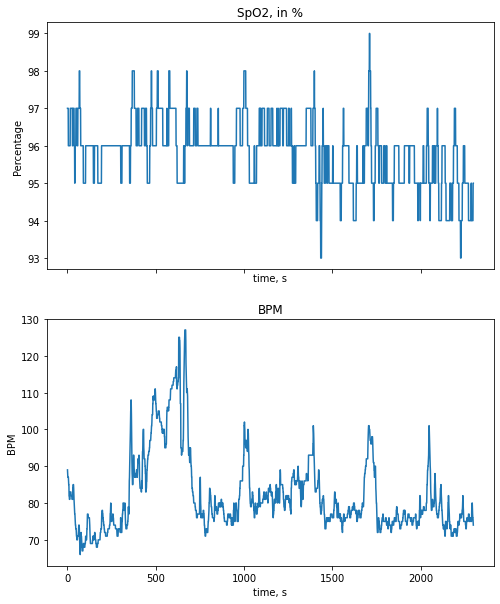

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), sharex=True)


time = spo2["Elapsed time(seconds)"]
spo2_percentage = spo2["SpO2(%)"]
spo2_bpm = spo2["hr (bpm)"]

# plotting input raw signal
ax1.plot(time, spo2_percentage, '-')
ax1.set_ylabel("Percentage")
ax1.set_xlabel("time, s")
ax1.set_title("SpO2, in %")


ax2.plot(time, spo2_bpm, '-')
ax2.set_xlabel("time, s")
ax2.set_ylabel("BPM")
ax2.set_title("BPM")

plt.show()

In [28]:
spo2_per_interval, bpm_per_interval, timestamps = [], [], []
for i in range(len(time) // 30):
    spo2_per_interval.append(sum(spo2_percentage[30 * i: 30 * (i+1)]) / 30)
    bpm_per_interval.append(sum(spo2_bpm[30 * i: 30 * (i+1)]) / 30)
    timestamps.append(30 * (i+1))

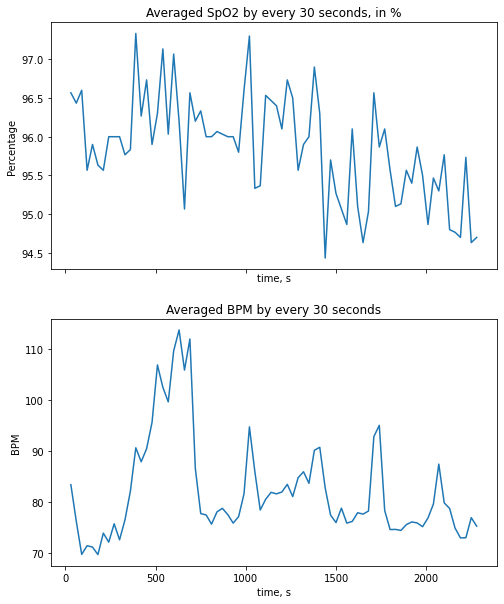

In [29]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), sharex=True)


time = timestamps
spo2_percentage = spo2_per_interval
spo2_bpm = bpm_per_interval

# plotting input raw signal
ax1.plot(time, spo2_percentage, '-')
ax1.set_ylabel("Percentage")
ax1.set_xlabel("time, s")
ax1.set_title("Averaged SpO2 by every 30 seconds, in %")


ax2.plot(time, spo2_bpm, '-')
ax2.set_xlabel("time, s")
ax2.set_ylabel("BPM")
ax2.set_title("Averaged BPM by every 30 seconds")

plt.show()

# Task 8

In [30]:
skull_pressure = np.array(pd.read_csv("files/TBI_ICP.txt"))
len(skull_pressure)

2700799

In [31]:
time = np.arange(0, len(skull_pressure) / 125, 1/125)

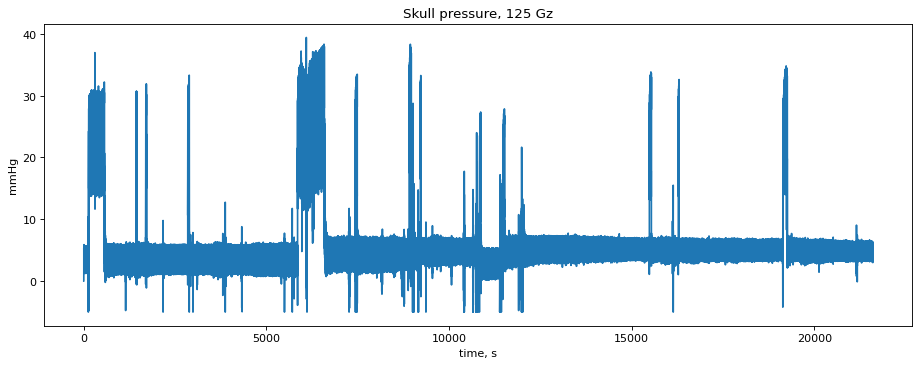

In [32]:
figure(figsize=(14, 5), dpi=80)

plt.plot(time, skull_pressure, '-')

plt.ylabel("mmHg")
plt.xlabel("time, s")
plt.title("Skull pressure, 125 Gz")
plt.show()

# Task 9

In [33]:
def print_part(time_start, time_end, signal, fq, plot=True, title="title"):
    length_sec = len(signal) / fq
    if length_sec < time_start:
        raise ValueError("time start out of bounds")
    if time_end > length_sec:
        raise ValueError("time end out of bounds")
    
    i = 0
    # skipping left parts, could be more effective:
    while i * (1 / fq) < time_start:
        i += 1
    signals_inside = []
    timestamps = []
    while i * (1 / fq) < time_end:
        signals_inside.append(signal[i])
        timestamps.append(i * (1 / fq))
        i += 1

    plt.plot(timestamps, signals_inside, "-")
    plt.title(title)
    plt.show()
    return timestamps, signals_inside

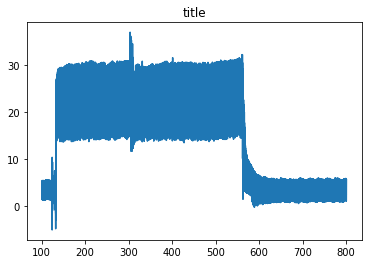

In [37]:
timestampls, signals_inside = print_part(100.948127983479, 800.94783694379834, skull_pressure, 125)
